In [6]:
#set up
import os
import pandas as pd
import numpy as np
from nilearn import image, input_data
from statsmodels.tsa.stattools import grangercausalitytests
import sys
import nibabel as nib

# Import your parameters
curr_dir = f'/user_data/csimmon2/git_repos/ptoc'
sys.path.insert(0, curr_dir)
import ptoc_params as params

# Set up directories and parameters
study = 'ptoc'
study_dir = f"/lab_data/behrmannlab/vlad/{study}"
results_dir = '/user_data/csimmon2/git_repos/ptoc/results'
raw_dir = params.raw_dir
sub_info = pd.read_csv(f'{curr_dir}/sub_info.csv')
#subs = ['sub-025']  # Update this list as needed
rois = ['pIPS', 'LO']  # We'll analyze the relationship between these two ROIs
hemispheres = ['left', 'right']
run_num = 3
runs = list(range(1, run_num + 1))
run_combos = [[rn1, rn2] for rn1 in range(1, run_num + 1) for rn2 in range(rn1 + 1, run_num + 1)]

In [4]:
#plots ROI pair comparison for objects

import pandas as pd
import numpy as np
from plotnine import ggplot, aes, geom_point, geom_linerange, theme_classic, ylim, xlab, ylab, theme, element_text, element_line, element_blank, scale_color_manual
import matplotlib.pyplot as plt

# File path
results_dir = '/user_data/csimmon2/git_repos/ptoc/results'
fig_dir = f"{results_dir}/gca"
input_file = f"{results_dir}/gca/subject_roi_pair_summary.csv"

# Read the CSV file
df = pd.read_csv(input_file)

# Set the 'sub' column as the index
df.set_index('sub', inplace=True)

# Print column names
print("Column names in the dataframe:")
print(df.columns)

# Print the first few rows of the dataframe
print("\nFirst few rows of the dataframe:")
print(df.head())

# Define ROI pairs and their names
roi_pairs = ['lpIPS-lLO', 'lpIPS-rLO', 'rpIPS-lLO', 'rpIPS-rLO']
pair_names = ['Left pIPS - Left LO', 'Left pIPS - Right LO', 'Right pIPS - Left LO', 'Right pIPS - Right LO']

# Create summary dataframe
summary_df = pd.DataFrame(columns=["ROI Pair", "GCA", "SE"])
summary_df['ROI Pair'] = pair_names
summary_df['GCA'] = df[roi_pairs].mean().values
summary_df['SE'] = df[roi_pairs].sem().values

# Create the plot
plot = (ggplot(summary_df, aes(x='ROI Pair', y='GCA', color='ROI Pair'))
        + geom_linerange(aes(ymin='GCA - SE', ymax='GCA + SE'), size=1)
        + geom_point(shape='o', size=4, fill='white', stroke=1)
        + theme_classic()
        + xlab('ROI Pair')
        + ylab('F_diff')
        + theme(
            text=element_text(color='black'),
            axis_text_x=element_text(angle=30, size=12),
            axis_text_y=element_text(size=12),
            axis_title=element_text(size=14),
            axis_line=element_line(),
            panel_border=element_blank(),
            legend_position="none",
            figure_size=(8, 6)
        )
        + scale_color_manual(values=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']))

# Save the plot
plot.save(f'{fig_dir}/gca_roi_pair_comparison.png', width=8, height=6, dpi=300)

print(f"\nGCA ROI pair comparison plot has been saved to {fig_dir}/gca_roi_pair_comparison.png")

# Perform paired t-tests
from scipy import stats

# Compare lpIPS to rpIPS for lLO connections
t_stat_lLO, p_val_lLO = stats.ttest_rel(df['lpIPS-lLO'], df['rpIPS-lLO'])
print("\nPaired t-test results for lpIPS-lLO vs rpIPS-lLO:")
print(f"t-statistic: {t_stat_lLO}")
print(f"p-value: {p_val_lLO}")

# Compare lpIPS to rpIPS for rLO connections
t_stat_rLO, p_val_rLO = stats.ttest_rel(df['lpIPS-rLO'], df['rpIPS-rLO'])
print("\nPaired t-test results for lpIPS-rLO vs rpIPS-rLO:")
print(f"t-statistic: {t_stat_rLO}")
print(f"p-value: {p_val_rLO}")

# Save the comparison results
with open(f"{fig_dir}/gca_roi_pair_comparison_results.txt", 'w') as f:
    f.write("GCA ROI Pair Comparison Results:\n\n")
    f.write(f"lpIPS-lLO vs rpIPS-lLO:\n")
    f.write(f"t-statistic: {t_stat_lLO}\n")
    f.write(f"p-value: {p_val_lLO}\n\n")
    f.write(f"lpIPS-rLO vs rpIPS-rLO:\n")
    f.write(f"t-statistic: {t_stat_rLO}\n")
    f.write(f"p-value: {p_val_rLO}\n")

print(f"\nGCA ROI pair comparison results have been saved to {fig_dir}/gca_roi_pair_comparison_results.txt")

Column names in the dataframe:
Index(['lpIPS-lLO', 'lpIPS-rLO', 'rpIPS-lLO', 'rpIPS-rLO'], dtype='object')

First few rows of the dataframe:
         lpIPS-lLO  lpIPS-rLO  rpIPS-lLO  rpIPS-rLO
sub                                                
sub-025   6.542707   3.976337  -0.273055  -5.516101
sub-038  36.221112   6.748750   5.041650   0.858832
sub-057   1.978192  33.322356   3.193565  21.792058
sub-059   7.953541   1.820534   0.604075 -19.537321
sub-064   1.015321   3.283093   1.859057   4.341189


/home/csimmon2/anaconda3/envs/fmri/lib/python3.9/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 8 x 6 in image.
/home/csimmon2/anaconda3/envs/fmri/lib/python3.9/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: /user_data/csimmon2/git_repos/ptoc/results/gca/gca_roi_pair_comparison.png



GCA ROI pair comparison plot has been saved to /user_data/csimmon2/git_repos/ptoc/results/gca/gca_roi_pair_comparison.png

Paired t-test results for lpIPS-lLO vs rpIPS-lLO:
t-statistic: 2.892572464178214
p-value: 0.009699711497479016

Paired t-test results for lpIPS-rLO vs rpIPS-rLO:
t-statistic: 3.165709233510401
p-value: 0.005350708723379199

GCA ROI pair comparison results have been saved to /user_data/csimmon2/git_repos/ptoc/results/gca/gca_roi_pair_comparison_results.txt


INFO:root:
Compiled Results:
INFO:root:         lpIPS-lLO  lpIPS-rLO  rpIPS-lLO  rpIPS-rLO
sub-025   1.369864   0.325290  11.042512   7.201621
sub-038  -2.131606  -1.114698  -3.675020   1.412311
sub-057  -3.047650   2.081581  -1.197274  -1.811796
sub-059   1.441232   1.853259  -0.975557  -0.539379
sub-064  -0.556793 -16.600586  -6.533298  -6.850180
sub-067   8.484211   8.267732  11.108707   6.470025
sub-068  -3.091490   2.249988  -1.687189   2.598046
sub-071  -1.370891   1.599645  -1.104093   7.679029
sub-083   2.284758   2.976932   2.910811  -2.214600
sub-084   0.687052  -3.986532  -1.268255   0.070003
sub-085   2.437361  16.623136  -5.023853   6.710007
sub-087   5.399558   0.166250   1.658659  -3.240620
sub-088  -5.584571   0.795219  -3.632891  -0.505981
sub-093  -2.346411  -0.498984  -1.941036  -1.617418
sub-094   8.019894   4.073657   9.977317   1.824227
sub-095   4.736025   1.605905  -0.107189   0.571859
sub-096   2.404510  -0.753009   1.845613  -1.573688
sub-097   0.544281  -0.23

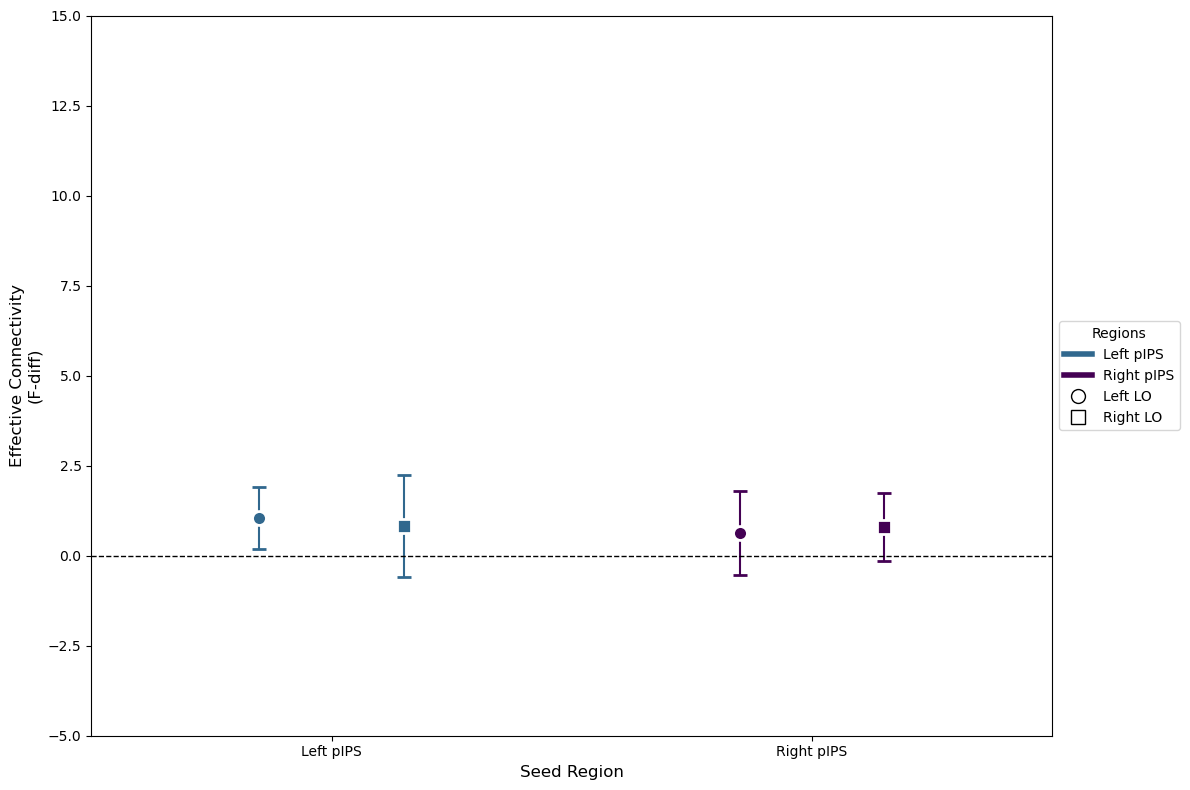

In [2]:
#plotting and analyzing GCA SCRAMBLE results
import pandas as pd
import numpy as np
import os
import logging
from scipy import stats
import matplotlib.pyplot as plt

# Set up logging
logging.basicConfig(level=logging.INFO)

# Set up directories and parameters
study = 'ptoc'
study_dir = f"/lab_data/behrmannlab/vlad/{study}"
localizer = 'Scramble'  # scramble or object. This is the localizer task.
results_dir = '/user_data/csimmon2/git_repos/ptoc/results'
raw_dir = "/lab_data/behrmannlab/vlad/ptoc"  # Replace with actual path if different

# Load subject information
curr_dir = os.getcwd()
sub_info = pd.read_csv(f'{curr_dir}/sub_info.csv')
sub_info = sub_info[sub_info['group'] == 'control']
subs = sub_info['sub'].tolist()

all_subjects_data = []
roi_pairs = [('lpIPS', 'lLO'), ('lpIPS', 'rLO'), ('rpIPS', 'lLO'), ('rpIPS', 'rLO')]

# Data compilation
for ss in subs:
    sub_dir = f'{study_dir}/{ss}/ses-01/'
    file_path = f'{sub_dir}/derivatives/gca/gca_summary_{localizer.lower()}.csv'
    
    if not os.path.exists(file_path):
        logging.warning(f"File not found: {file_path}. Skipping this subject.")
        all_subjects_data.append({f'{origin}-{target}': None for origin, target in roi_pairs})
        continue
    
    try:
        curr_df = pd.read_csv(file_path)
        subject_data = {}
        
        for origin, target in roi_pairs:
            pair_data = curr_df[(curr_df['origin'] == origin) & (curr_df['target'] == target)]
            if not pair_data.empty:
                subject_data[f'{origin}-{target}'] = pair_data['f_diff'].mean()
            else:
                subject_data[f'{origin}-{target}'] = None
        
        all_subjects_data.append(subject_data)
    
    except pd.errors.EmptyDataError:
        logging.warning(f"Empty file: {file_path}. Skipping this subject.")
        all_subjects_data.append({f'{origin}-{target}': None for origin, target in roi_pairs})
    except Exception as e:
        logging.error(f"Error reading file {file_path}: {str(e)}. Skipping this subject.")
        all_subjects_data.append({f'{origin}-{target}': None for origin, target in roi_pairs})

if not all_subjects_data:
    logging.error("No valid data found for any subjects. Cannot create summary.")
else:
    result_df = pd.DataFrame(all_subjects_data, index=subs)
    logging.info("\nCompiled Results:")
    logging.info(result_df.to_string())
    
    # Save compiled results to CSV
    output_file = f'{results_dir}/subject_roi_pair_summary_{localizer.lower()}.csv'
    result_df.to_csv(output_file)
    logging.info(f"\nResults saved to {output_file}")

    # Statistical Analysis
    def cohens_d(x, y):
        return (x.mean() - y.mean()) / np.sqrt((x.var() + y.var()) / 2)

    summary_table = pd.DataFrame(columns=["origin", "target", "Mean f_diff", "SE f_diff", 
                                        "W_statistic", "p_value", "Effect size", "significant"])

    for pair in roi_pairs:
        origin, target = pair
        pair_name = f'{origin}-{target}'
        data = result_df[pair_name].dropna()
        
        if len(data) > 0:
            mean_f_diff = data.mean()
            se_f_diff = data.sem()  # Changed from std() to sem()
            w_stat, p_val = stats.wilcoxon(data)
            effect_size = cohens_d(data, pd.Series([0] * len(data)))  # Compare to 0
            significant = p_val < 0.05
            
            summary_table = summary_table.append({
                "origin": origin,
                "target": target,
                "Mean f_diff": round(mean_f_diff, 2),
                "SE f_diff": round(se_f_diff, 2),  # Changed column name and calculation
                "W_statistic": round(w_stat, 2),
                "p_value": round(p_val, 5),
                "Effect size": round(effect_size, 2),
                "significant": significant
            }, ignore_index=True)
        else:
            logging.warning(f"No valid data for {pair_name}")

    logging.info("\nGCA Summary Table:")
    logging.info(summary_table.to_string(index=False))

    # Save the summary table
    summary_output = f"{results_dir}/gca_summary_table_{localizer.lower()}.csv"
    summary_table.to_csv(summary_output, index=False)
    logging.info(f"\nGCA summary table has been saved to {summary_output}")
    
    # Plotting
    plt.figure(figsize=(12, 8))
    colors = {'lpIPS': '#31688E', 'rpIPS': '#440154'}
    markers = {'lLO': 'o', 'rLO': 's'}
    x_offsets = {'lLO': -0.15, 'rLO': 0.15}

    for i, row in summary_table.iterrows():
        x_base = 0 if row['origin'] == 'lpIPS' else 1
        x = x_base + x_offsets[row['target']]
        y = row['Mean f_diff']
        yerr = row['SE f_diff']  # Changed from 'Std f_diff' to 'SE f_diff'
        
        plt.errorbar(x, y, yerr=yerr, fmt='none', ecolor=colors[row['origin']], capsize=5, capthick=2)
        plt.scatter(x, y, color=colors[row['origin']], marker=markers[row['target']], s=100, 
                    edgecolors='white', linewidth=2, zorder=3)

    plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
    plt.xlim(-0.5, 1.5)

    # Adjust y-limits to show full error bars
    y_min = min(row['Mean f_diff'] - row['SE f_diff'] for _, row in summary_table.iterrows())
    y_max = max(row['Mean f_diff'] + row['SE f_diff'] for _, row in summary_table.iterrows())
    plt.ylim(min(y_min - 1, -5), max(y_max + 1, 15))

    plt.xticks([0, 1], ['Left pIPS', 'Right pIPS'])
    plt.xlabel('Seed Region', fontsize=12)
    plt.ylabel('Effective Connectivity\n(F-diff)', fontsize=12)

    # Create combined legend
    from matplotlib.lines import Line2D
    legend_elements = [
        Line2D([0], [0], color=colors['lpIPS'], lw=4, label='Left pIPS'),
        Line2D([0], [0], color=colors['rpIPS'], lw=4, label='Right pIPS'),
        Line2D([0], [0], marker='o', color='black', label='Left LO', markerfacecolor='none', markersize=10, linestyle='None'),
        Line2D([0], [0], marker='s', color='black', label='Right LO', markerfacecolor='none', markersize=10, linestyle='None')
    ]

    plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5), title='Regions')

    plt.tight_layout()
    plot_output = f"{results_dir}/gca_plot_{localizer.lower()}.png"
    plt.savefig(plot_output, dpi=300, bbox_inches='tight')
    logging.info(f"Plot saved to {plot_output}")

    # Debugging information
    logging.info("\nDebugging information:")
    logging.info(summary_table)
    logging.info("\nPlot data:")
    for i, row in summary_table.iterrows():
        logging.info(f"Origin: {row['origin']}, Target: {row['target']}, Mean f_diff: {row['Mean f_diff']}, SE f_diff: {row['SE f_diff']}")

logging.info("Analysis and plotting complete.")

In [8]:
#GCA roi comparison with objects, partially modified for scrambled 


import pandas as pd
import numpy as np
from plotnine import (ggplot, aes, geom_point, geom_linerange, theme_classic, 
                      ylim, xlab, ylab, theme, element_text, element_line, 
                      element_blank, scale_color_manual, position_dodge2, 
                      geom_hline, scale_shape_manual, labs)
import matplotlib.pyplot as plt
from scipy import stats

# File path
results_dir = '/user_data/csimmon2/git_repos/ptoc/results'
fig_dir = f"{results_dir}/gca"
#input_file = f"{results_dir}/gca/subject_roi_pair_summary.csv" #OBJECT
input_file = f"{results_dir}/gca/subject_roi_pair_summary_scramble.csv" #SCRAMBLE

# Read the CSV file
df = pd.read_csv(input_file)

# Set the 'sub' column as the index
df.set_index('sub', inplace=True)

# Print column names
print("Column names in the dataframe:")
print(df.columns)

# Print the first few rows of the dataframe
print("\nFirst few rows of the dataframe:")
print(df.head())

# Define ROI pairs and their names
roi_pairs = ['lpIPS-lLO', 'lpIPS-rLO', 'rpIPS-lLO', 'rpIPS-rLO']
roi_names = ['Left pIPS', 'Left pIPS', 'Right pIPS', 'Right pIPS']
loc_names = ['posterior', 'posterior', 'posterior', 'posterior']
cond_names = ['Left LO', 'Right LO', 'Left LO', 'Right LO']

# Function to calculate effect size (Cohen's d for paired samples)
def cohens_d(x, y):
    return (x.mean() - y.mean()) / np.sqrt((x.var() + y.var()) / 2)

# Create summary dataframe for the table
summary_table = pd.DataFrame(columns=["origin", "target", "Mean f_diff", "Std f_diff", 
                                      "W_statistic", "p_value", "Effect size", "significant"])

for pair in roi_pairs:
    origin, target = pair.split('-')
    data = df[pair]
    
    mean_f_diff = data.mean()
    std_f_diff = data.std()
    w_stat, p_val = stats.wilcoxon(data)
    effect_size = cohens_d(data, pd.Series([0] * len(data)))  # Compare to 0
    significant = p_val < 0.05
    
    summary_table = summary_table.append({
        "origin": origin,
        "target": target,
        "Mean f_diff": round(mean_f_diff, 2),
        "Std f_diff": round(std_f_diff, 2),
        "W_statistic": round(w_stat, 2),
        "p_value": round(p_val, 5),
        "Effect size": round(effect_size, 2),
        "significant": significant
    }, ignore_index=True)

# Print the summary table
print("\nGCA Summary Table:")
print(summary_table.to_string(index=False))

# Save the summary table
#summary_table.to_csv(f"{fig_dir}/gca_summary_table.csv", index=False)
summary_table.to_csv(f"{fig_dir}/gca_summary_table_scramble.csv", index=False)
print(f"\nGCA summary table has been saved to {fig_dir}/gca_summary_table_scramble.csv")

# Create summary dataframe for the plot
summary_df = pd.DataFrame(columns=["ROI", "LOC", "COND", "GC", "SE"])
summary_df['ROI'] = roi_names
summary_df['LOC'] = loc_names
summary_df['COND'] = cond_names
summary_df['GC'] = df[roi_pairs].mean().values
summary_df['SE'] = df[roi_pairs].sem().values

# Make ROI and COND categorical
summary_df['ROI'] = pd.Categorical(summary_df['ROI'], categories=['Left pIPS', 'Right pIPS'], ordered=False)
summary_df['COND'] = pd.Categorical(summary_df['COND'], categories=['Left LO', 'Right LO'], ordered=False)

# Create the plot
plot = (ggplot(summary_df, aes(x='ROI', y='GC', color='ROI', shape='COND'))
        + geom_linerange(aes(ymin='GC - SE', ymax='GC + SE'), 
                         size=1, position=position_dodge2(width=0.5))
        + geom_point(size=4, fill='white', stroke=1, 
                     position=position_dodge2(width=0.5))
        + ylim(-4, 17)
        + scale_color_manual(values=['#31688E', '#440154'])
        + scale_shape_manual(values=['o', 's'])
        + theme_classic()
        + labs(color='Seed Region', shape='Target Region')
        + xlab('Seed Region')
        + ylab('Effective Connectivity \n(GCA Value)')
        + geom_hline(yintercept=0, linetype='dashed', size=1)
        + theme(
            text=element_text(color='black'),
            axis_text_x=element_text(angle=30, size=12),
            axis_text_y=element_text(size=12),
            axis_title=element_text(size=14),
            axis_line=element_line(),
            panel_border=element_blank(),
            legend_position="right",
            legend_box="vertical",
            legend_title=element_text(size=12),
            legend_text=element_text(size=10),
            figure_size=(8, 6)
        ))

# Save the plot
#plot.save(f'{fig_dir}/gca_roi_pair_comparison_with_legend.png', width=8, height=6, dpi=300)
plot.save(f'{fig_dir}/gca_roi_pair_scramble_comparison_with_legend.png', width=8, height=6, dpi=300)

print(f"\nGCA ROI pair comparison plot with legend has been saved to {fig_dir}/gca_roi_pair_scramble_comparison_with_legend.png")

# Perform paired t-tests
print("\nAdditional Paired T-Tests:")

# Compare lpIPS to rpIPS for lLO connections
t_stat_lLO, p_val_lLO = stats.ttest_rel(df['lpIPS-lLO'], df['rpIPS-lLO'])
print("Paired t-test results for lpIPS-lLO vs rpIPS-lLO:")
print(f"t-statistic: {t_stat_lLO}")
print(f"p-value: {p_val_lLO}")

# Compare lpIPS to rpIPS for rLO connections
t_stat_rLO, p_val_rLO = stats.ttest_rel(df['lpIPS-rLO'], df['rpIPS-rLO'])
print("\nPaired t-test results for lpIPS-rLO vs rpIPS-rLO:")
print(f"t-statistic: {t_stat_rLO}")
print(f"p-value: {p_val_rLO}")

# Save the comparison results
with open(f"{fig_dir}/gca_roi_pair_scramble_comparison_results.txt", 'w') as f:
    f.write("GCA ROI Pair Comparison Results:\n\n")
    f.write(f"lpIPS-lLO vs rpIPS-lLO:\n")
    f.write(f"t-statistic: {t_stat_lLO}\n")
    f.write(f"p-value: {p_val_lLO}\n\n")
    f.write(f"lpIPS-rLO vs rpIPS-rLO:\n")
    f.write(f"t-statistic: {t_stat_rLO}\n")
    f.write(f"p-value: {p_val_rLO}\n")

print(f"\nGCA ROI pair comparison results have been saved to {fig_dir}/gca_roi_pair_comparison_results.txt")

Column names in the dataframe:
Index(['lpIPS-lLO', 'lpIPS-rLO', 'rpIPS-lLO', 'rpIPS-rLO'], dtype='object')

First few rows of the dataframe:
         lpIPS-lLO  lpIPS-rLO  rpIPS-lLO  rpIPS-rLO
sub                                                
sub-025   6.542707   3.976337  -0.273055  -5.516101
sub-038  36.221112   6.748750   5.041650   0.858832
sub-057   1.978192  33.322356   3.193565  21.792058
sub-059   7.953541   1.820534   0.604075 -19.537321
sub-064   1.015321   3.283093   1.859057   4.341189

GCA Summary Table:
origin target  Mean f_diff  Std f_diff  W_statistic  p_value  Effect size significant
 lpIPS    lLO         7.71       11.70         21.0  0.00169         0.93        True
 lpIPS    rLO         7.49        9.01         10.0  0.00016         1.18        True
 rpIPS    lLO         1.82        8.12         61.0  0.18187         0.32       False
 rpIPS    rLO         1.58        9.33         66.0  0.25793         0.24       False

GCA summary table has been saved to /user_da

/tmp/ipykernel_39246/2119487643.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/tmp/ipykernel_39246/2119487643.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/tmp/ipykernel_39246/2119487643.py:53: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
/tmp/ipykernel_39246/2119487643.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/tmp/ipykernel_39246/2119487643.py:53: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
/tmp/ipykernel_39246/2119487643.py:53: FutureWarning: The fr


GCA ROI pair comparison plot with legend has been saved to /user_data/csimmon2/git_repos/ptoc/results/gca/gca_roi_pair_comparison_with_legend.png

Additional Paired T-Tests:
Paired t-test results for lpIPS-lLO vs rpIPS-lLO:
t-statistic: 2.892572464178214
p-value: 0.009699711497479016

Paired t-test results for lpIPS-rLO vs rpIPS-rLO:
t-statistic: 3.165709233510401
p-value: 0.005350708723379199

GCA ROI pair comparison results have been saved to /user_data/csimmon2/git_repos/ptoc/results/gca/gca_roi_pair_comparison_results.txt


In [11]:
#object t-testing

import pandas as pd
import numpy as np
from scipy import stats
import os

def analyze_gca_results(input_file, output_file, p_threshold=0.05):
    # Read the CSV file
    df = pd.read_csv(input_file)
    
    print(f"Input file last modified: {pd.to_datetime(os.path.getmtime(input_file), unit='s')}")
    print("First few rows of input data:")
    print(df.head())
    
    # Define the ROI pairs we're interested in
    roi_pairs = ['lpIPS-lLO', 'lpIPS-rLO', 'rpIPS-lLO', 'rpIPS-rLO']
    
    results = []
    for pair in roi_pairs:
        # Perform Wilcoxon signed-rank test comparing to 0
        statistic, p_value = stats.wilcoxon(df[pair], zero_method="wilcox")
        
        # Calculate effect size (r = Z / sqrt(N))
        effect_size = statistic / np.sqrt(len(df))
        
        # Determine significance
        significant = p_value < p_threshold
        
        # Split the pair into origin and target
        origin, target = pair.split('-')
        
        results.append({
            'origin': origin,
            'target': target,
            'mean_f_diff': np.mean(df[pair]),
            'std_f_diff': np.std(df[pair], ddof=1),
            'W_statistic': statistic,
            'p_value': p_value,
            'effect_size': effect_size,
            'significant': significant
        })
    
    # Create results DataFrame
    results_df = pd.DataFrame(results)
    
    # Sort results
    results_df = results_df.sort_values(['origin', 'target'])
    
    # Save results
    results_df.to_csv(output_file, index=False)
    
    return results_df

# Usage
results_dir = '/user_data/csimmon2/git_repos/ptoc/results'
input_file = f"{results_dir}/gca/subject_roi_pair_summary.csv"
output_file = f"{results_dir}/gca/gca_results_with_stats.csv"

# Ensure the output directory exists
os.makedirs(os.path.dirname(output_file), exist_ok=True)

# Run the analysis
results = analyze_gca_results(input_file, output_file)

# Print results
print("\nAnalysis results:")
print(results)

print(f"\nResults saved to: {output_file}")
print(f"Output file last modified: {pd.to_datetime(os.path.getmtime(output_file), unit='s')}")

Input file last modified: 2024-09-18 18:44:18.193282816
First few rows of input data:
       sub  lpIPS-lLO  lpIPS-rLO  rpIPS-lLO  rpIPS-rLO
0  sub-025   6.542707   3.976337  -0.273055  -5.516101
1  sub-038  36.221112   6.748750   5.041650   0.858832
2  sub-057   1.978192  33.322356   3.193565  21.792058
3  sub-059   7.953541   1.820534   0.604075 -19.537321
4  sub-064   1.015321   3.283093   1.859057   4.341189

Analysis results:
  origin target  mean_f_diff  std_f_diff  W_statistic   p_value  effect_size  \
0  lpIPS    lLO     7.714844   11.702146         21.0  0.001694     4.817730   
1  lpIPS    rLO     7.492830    9.013431         10.0  0.000164     2.294157   
2  rpIPS    lLO     1.818136    8.123857         61.0  0.181866    13.994360   
3  rpIPS    rLO     1.581903    9.326387         66.0  0.257927    15.141438   

   significant  
0         True  
1         True  
2        False  
3        False  

Results saved to: /user_data/csimmon2/git_repos/ptoc/results/gca/gca_results_w

T-statistic: 4.3302
P-value: 0.0001
W-statistic: 116.0000
Wilcoxon p-value: 0.0001


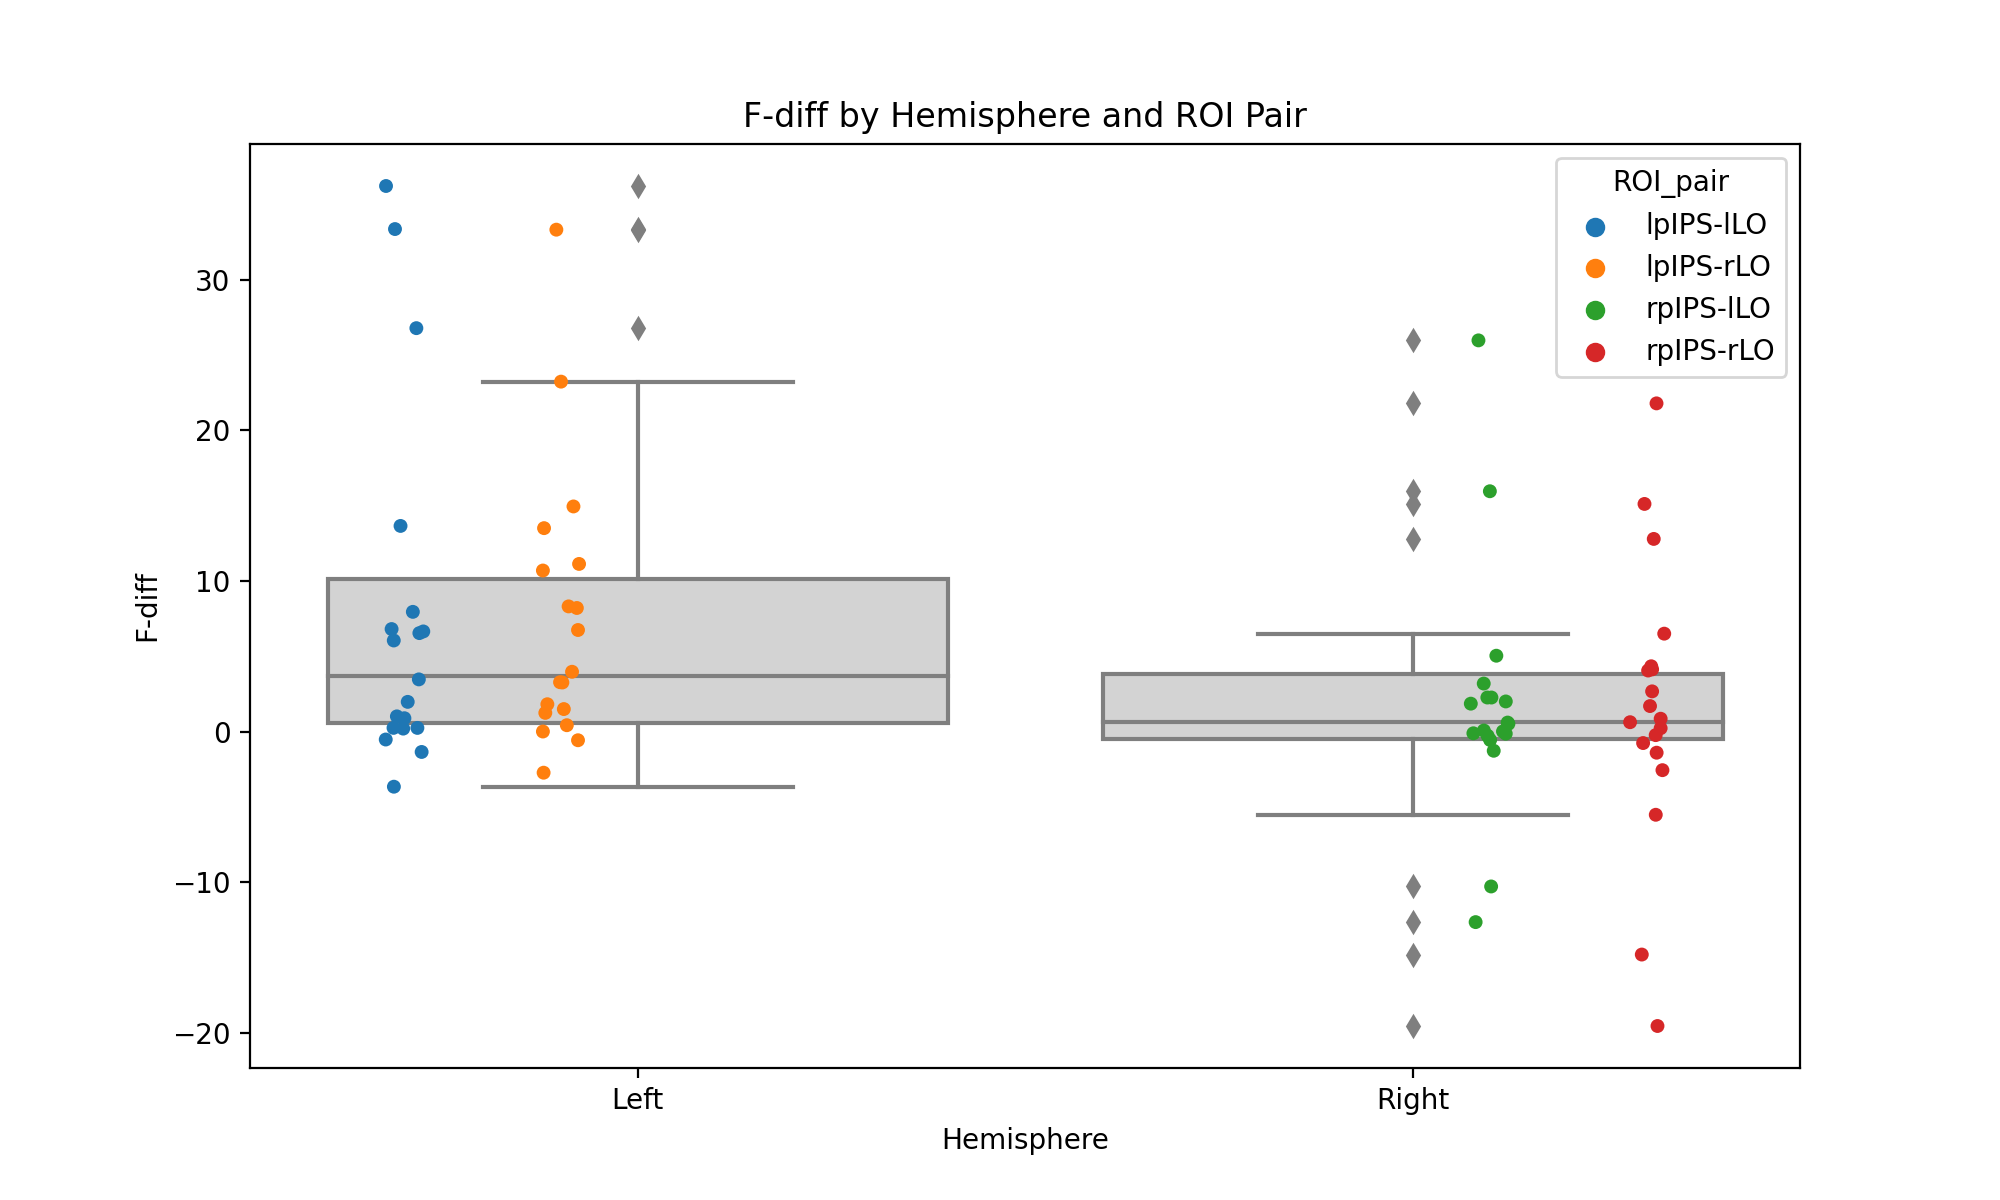

In [10]:
#spotted object plot - it's okay
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import os

df = pd.read_csv(input_file)

# Organize data
left_hemisphere = df[['lpIPS-lLO', 'lpIPS-rLO']]
right_hemisphere = df[['rpIPS-lLO', 'rpIPS-rLO']]

# Reshape data for analysis
left_data = left_hemisphere.values.flatten()
right_data = right_hemisphere.values.flatten()

# Perform paired t-test
t_statistic, p_value = stats.ttest_rel(left_data, right_data)

print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Wilcoxon signed-rank test
w_statistic, w_p_value = stats.wilcoxon(left_data, right_data)

print(f"W-statistic: {w_statistic:.4f}")
print(f"Wilcoxon p-value: {w_p_value:.4f}")

import seaborn as sns
import matplotlib.pyplot as plt

# Reshape data for plotting
plot_data = pd.melt(df, value_vars=['lpIPS-lLO', 'lpIPS-rLO', 'rpIPS-lLO', 'rpIPS-rLO'], 
                    var_name='ROI_pair', value_name='F-diff')
plot_data['Hemisphere'] = plot_data['ROI_pair'].apply(lambda x: 'Left' if x.startswith('l') else 'Right')

# Create plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Hemisphere', y='F-diff', data=plot_data, color='lightgray')
sns.stripplot(x='Hemisphere', y='F-diff', hue='ROI_pair', data=plot_data, jitter=True, dodge=True)

plt.title('F-diff by Hemisphere and ROI Pair')
plt.show()

In [4]:
#checking consistency of sphere coordinates

import os
import pandas as pd
import glob

# Set up directories
study = 'ptoc'
study_dir = f"/lab_data/behrmannlab/vlad/{study}"
output_dir = '/user_data/csimmon2/git_repos/ptoc/results'

# Read subject info
sub_info = pd.read_csv('/user_data/csimmon2/git_repos/ptoc/sub_info.csv')
sub_info = sub_info[sub_info['group'] == 'control']
subs = sub_info['sub'].tolist()

# Initialize an empty list to store dataframes
all_coords = []

# Loop through each subject
for sub in subs:
    sub_dir = f'{study_dir}/{sub}/ses-01/'
    roi_dir = f'{sub_dir}/derivatives/rois'
    coord_file = f'{roi_dir}/spheres/sphere_coords_hemisphere.csv'
    
    if os.path.exists(coord_file):
        # Read the coordinate file
        coords = pd.read_csv(coord_file)
        
        # Add a subject column
        coords['subject'] = sub
        
        # Append to the list
        all_coords.append(coords)
    else:
        print(f"Coordinate file not found for subject {sub}")

# Combine all dataframes
if all_coords:
    combined_coords = pd.concat(all_coords, ignore_index=True)
    
    # Rearrange columns for better readability
    columns_order = ['subject', 'index', 'task', 'roi', 'hemisphere', 'x', 'y', 'z']
    combined_coords = combined_coords[columns_order]
    
    # Sort the dataframe
    combined_coords = combined_coords.sort_values(['subject', 'index', 'task', 'roi', 'hemisphere'])
    
    # Save the combined coordinates
    output_file = f"{output_dir}/all_subjects_roi_coordinates.csv"
    combined_coords.to_csv(output_file, index=False)
    print(f"Combined ROI coordinates saved to {output_file}")
    
    # Display summary statistics
    print("\nSummary of ROI coordinates:")
    summary = combined_coords.groupby(['index', 'task', 'roi', 'hemisphere'])[['x', 'y', 'z']].agg(['mean', 'std', 'min', 'max'])
    print(summary)
else:
    print("No coordinate data found for any subjects.")

# Optionally, check for consistency across subjects
print("\nChecking for consistency across subjects...")
consistency_check = combined_coords.groupby(['index', 'task', 'roi', 'hemisphere', 'x', 'y', 'z'])['subject'].nunique()
inconsistent = consistency_check[consistency_check > 1]

if not inconsistent.empty:
    print("The following coordinates are inconsistent across subjects:")
    print(inconsistent)
else:
    print("All coordinates are consistent across subjects.")

Combined ROI coordinates saved to /user_data/csimmon2/git_repos/ptoc/results/all_subjects_roi_coordinates.csv

Summary of ROI coordinates:
                                    x                                   \
                                 mean        std        min        max   
index task roi  hemisphere                                               
0     loc  LO   left       -41.337993   7.791248 -54.249945 -26.431209   
                right       43.205656   7.710696  28.977228  59.471243   
           PFS  left       -37.647686   6.444061 -47.103784 -27.644333   
                right       36.609713   5.380563  30.381416  50.206587   
           aIPS left       -25.437536   5.704122 -38.380382 -16.619854   
                right       27.343090   9.655712   5.696961  38.007754   
           pIPS left       -28.799145  10.524587 -53.873020 -11.283607   
                right       32.980370   9.948634  16.502661  48.394227   
1     loc  LO   left       -40.948558   7.06036

In [11]:
##attempted plot of scramble and object data on the same diagram currently non-functional
import pandas as pd
import numpy as np
from plotnine import (ggplot, aes, geom_point, geom_linerange, theme_classic, 
                      ylim, xlab, ylab, theme, element_text, element_line, 
                      element_blank, scale_color_manual, position_dodge2, 
                      geom_hline, scale_shape_manual, labs, facet_wrap)
import matplotlib.pyplot as plt
from scipy import stats

# File paths
results_dir = '/user_data/csimmon2/git_repos/ptoc/results'
fig_dir = f"{results_dir}/gca"
object_input_file = f"{results_dir}/gca/subject_roi_pair_summary.csv"
scramble_input_file = f"{results_dir}/gca/subject_roi_pair_summary_scramble.csv"

# Read the CSV files
df_object = pd.read_csv(object_input_file)
df_scramble = pd.read_csv(scramble_input_file)

# Set the 'sub' column as the index
df_object.set_index('sub', inplace=True)
df_scramble.set_index('sub', inplace=True)

# Define ROI pairs and their names
roi_pairs = ['lpIPS-lLO', 'lpIPS-rLO', 'rpIPS-lLO', 'rpIPS-rLO']
roi_names = ['Left pIPS', 'Left pIPS', 'Right pIPS', 'Right pIPS']
loc_names = ['posterior', 'posterior', 'posterior', 'posterior']
cond_names = ['Left LO', 'Right LO', 'Left LO', 'Right LO']

# Function to calculate effect size (Cohen's d for paired samples)
def cohens_d(x, y):
    return (x.mean() - y.mean()) / np.sqrt((x.var() + y.var()) / 2)

# Function to create summary table
def create_summary_table(df, condition):
    summary_table = pd.DataFrame(columns=["origin", "target", "condition", "Mean f_diff", "Std f_diff", 
                                          "W_statistic", "p_value", "Effect size", "significant"])
    
    for pair in roi_pairs:
        origin, target = pair.split('-')
        data = df[pair]
        
        mean_f_diff = data.mean()
        std_f_diff = data.std()
        w_stat, p_val = stats.wilcoxon(data)
        effect_size = cohens_d(data, pd.Series([0] * len(data)))  # Compare to 0
        significant = p_val < 0.05
        
        summary_table = summary_table.append({
            "origin": origin,
            "target": target,
            "condition": condition,
            "Mean f_diff": round(mean_f_diff, 2),
            "Std f_diff": round(std_f_diff, 2),
            "W_statistic": round(w_stat, 2),
            "p_value": round(p_val, 5),
            "Effect size": round(effect_size, 2),
            "significant": significant
        }, ignore_index=True)
    
    return summary_table

# Create summary tables
summary_table_object = create_summary_table(df_object, "Object")
summary_table_scramble = create_summary_table(df_scramble, "Scramble")

# Combine summary tables
summary_table_combined = pd.concat([summary_table_object, summary_table_scramble])

# Print the combined summary table
print("\nCombined GCA Summary Table:")
print(summary_table_combined.to_string(index=False))

# Save the combined summary table
summary_table_combined.to_csv(f"{fig_dir}/gca_summary_table_combined.csv", index=False)
print(f"\nCombined GCA summary table has been saved to {fig_dir}/gca_summary_table_combined.csv")

# Create summary dataframe for the plot
def create_summary_df(df, condition):
    summary_df = pd.DataFrame(columns=["ROI", "LOC", "COND", "GC", "SE", "condition"])
    summary_df['ROI'] = roi_names
    summary_df['LOC'] = loc_names
    summary_df['COND'] = cond_names
    summary_df['GC'] = df[roi_pairs].mean().values
    summary_df['SE'] = df[roi_pairs].sem().values
    summary_df['condition'] = condition
    return summary_df

summary_df_object = create_summary_df(df_object, "Object")
summary_df_scramble = create_summary_df(df_scramble, "Scramble")
summary_df_combined = pd.concat([summary_df_object, summary_df_scramble])

# Make ROI, COND, and condition categorical
summary_df_combined['ROI'] = pd.Categorical(summary_df_combined['ROI'], categories=['Left pIPS', 'Right pIPS'], ordered=False)
summary_df_combined['COND'] = pd.Categorical(summary_df_combined['COND'], categories=['Left LO', 'Right LO'], ordered=False)
summary_df_combined['condition'] = pd.Categorical(summary_df_combined['condition'], categories=['Object', 'Scramble'], ordered=False)

# Create the plot
plot = (ggplot(summary_df_combined, aes(x='ROI', y='GC', color='condition', shape='COND'))
        + geom_linerange(aes(ymin='GC - SE', ymax='GC + SE'), 
                         size=1, position=position_dodge2(width=0.5))
        + geom_point(size=4, fill='white', stroke=1, 
                     position=position_dodge2(width=0.5))
        + ylim(-4, 17)
        + scale_color_manual(values=['#31688E', '#440154'])
        + scale_shape_manual(values=['o', 's'])
        + theme_classic()
        + labs(color='Condition', shape='Target Region')
        + xlab('Seed Region')
        + ylab('Effective Connectivity \n(GCA Value)')
        + geom_hline(yintercept=0, linetype='dashed', size=1)
        + theme(
            text=element_text(color='black'),
            axis_text_x=element_text(angle=30, size=12),
            axis_text_y=element_text(size=12),
            axis_title=element_text(size=14),
            axis_line=element_line(),
            panel_border=element_blank(),
            legend_position="right",
            legend_box="vertical",
            legend_title=element_text(size=12),
            legend_text=element_text(size=10),
            figure_size=(10, 6)
        )
        + facet_wrap('~ condition'))

# Save the plot
plot.save(f'{fig_dir}/gca_roi_pair_combined_comparison_with_legend.png', width=10, height=6, dpi=300)

print(f"\nCombined GCA ROI pair comparison plot with legend has been saved to {fig_dir}/gca_roi_pair_combined_comparison_with_legend.png")

# Perform paired t-tests for both conditions
def perform_paired_ttests(df, condition):
    print(f"\nAdditional Paired T-Tests for {condition}:")
    
    # Compare lpIPS to rpIPS for lLO connections
    t_stat_lLO, p_val_lLO = stats.ttest_rel(df['lpIPS-lLO'], df['rpIPS-lLO'])
    print(f"Paired t-test results for lpIPS-lLO vs rpIPS-lLO ({condition}):")
    print(f"t-statistic: {t_stat_lLO}")
    print(f"p-value: {p_val_lLO}")

    # Compare lpIPS to rpIPS for rLO connections
    t_stat_rLO, p_val_rLO = stats.ttest_rel(df['lpIPS-rLO'], df['rpIPS-rLO'])
    print(f"\nPaired t-test results for lpIPS-rLO vs rpIPS-rLO ({condition}):")
    print(f"t-statistic: {t_stat_rLO}")
    print(f"p-value: {p_val_rLO}")
    
    return t_stat_lLO, p_val_lLO, t_stat_rLO, p_val_rLO

t_stat_lLO_obj, p_val_lLO_obj, t_stat_rLO_obj, p_val_rLO_obj = perform_paired_ttests(df_object, "Object")
t_stat_lLO_scr, p_val_lLO_scr, t_stat_rLO_scr, p_val_rLO_scr = perform_paired_ttests(df_scramble, "Scramble")

# Save the comparison results
with open(f"{fig_dir}/gca_roi_pair_combined_comparison_results.txt", 'w') as f:
    f.write("GCA ROI Pair Combined Comparison Results:\n\n")
    f.write("Object Condition:\n")
    f.write(f"lpIPS-lLO vs rpIPS-lLO:\n")
    f.write(f"t-statistic: {t_stat_lLO_obj}\n")
    f.write(f"p-value: {p_val_lLO_obj}\n\n")
    f.write(f"lpIPS-rLO vs rpIPS-rLO:\n")
    f.write(f"t-statistic: {t_stat_rLO_obj}\n")
    f.write(f"p-value: {p_val_rLO_obj}\n\n")
    f.write("Scramble Condition:\n")
    f.write(f"lpIPS-lLO vs rpIPS-lLO:\n")
    f.write(f"t-statistic: {t_stat_lLO_scr}\n")
    f.write(f"p-value: {p_val_lLO_scr}\n\n")
    f.write(f"lpIPS-rLO vs rpIPS-rLO:\n")
    f.write(f"t-statistic: {t_stat_rLO_scr}\n")
    f.write(f"p-value: {p_val_rLO_scr}\n")

print(f"\nCombined GCA ROI pair comparison results have been saved to {fig_dir}/gca_roi_pair_combined_comparison_results.txt")

/tmp/ipykernel_30512/2634667085.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/tmp/ipykernel_30512/2634667085.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/tmp/ipykernel_30512/2634667085.py:50: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
/tmp/ipykernel_30512/2634667085.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/tmp/ipykernel_30512/2634667085.py:50: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
/tmp/ipykernel_30512/2634667085.py:50: FutureWarning: The fr


Combined GCA Summary Table:
origin target condition  Mean f_diff  Std f_diff  W_statistic  p_value  Effect size significant
 lpIPS    lLO    Object         7.71       11.70         21.0  0.00169         0.93        True
 lpIPS    rLO    Object         7.49        9.01         10.0  0.00016         1.18        True
 rpIPS    lLO    Object         1.82        8.12         61.0  0.18187         0.32       False
 rpIPS    rLO    Object         1.58        9.33         66.0  0.25793         0.24       False
 lpIPS    lLO  Scramble         1.05        3.73         71.0  0.35246         0.40       False
 lpIPS    rLO  Scramble         0.82        6.17         65.0  0.24125         0.19       False
 rpIPS    lLO  Scramble         0.63        5.05         89.0  0.82878         0.18       False
 rpIPS    rLO  Scramble         0.79        4.10         79.0  0.54122         0.27       False

Combined GCA summary table has been saved to /user_data/csimmon2/git_repos/ptoc/results/gca/gca_summary_ta

INFO:matplotlib.font_manager:Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt



Combined GCA ROI pair comparison plot with legend has been saved to /user_data/csimmon2/git_repos/ptoc/results/gca/gca_roi_pair_combined_comparison_with_legend.png

Additional Paired T-Tests for Object:
Paired t-test results for lpIPS-lLO vs rpIPS-lLO (Object):
t-statistic: 2.892572464178214
p-value: 0.009699711497479016

Paired t-test results for lpIPS-rLO vs rpIPS-rLO (Object):
t-statistic: 3.165709233510401
p-value: 0.005350708723379199

Additional Paired T-Tests for Scramble:
Paired t-test results for lpIPS-lLO vs rpIPS-lLO (Scramble):
t-statistic: 0.48760461760449814
p-value: 0.6317157386114138

Paired t-test results for lpIPS-rLO vs rpIPS-rLO (Scramble):
t-statistic: 0.02705735729658044
p-value: 0.9787117123356462

Combined GCA ROI pair comparison results have been saved to /user_data/csimmon2/git_repos/ptoc/results/gca/gca_roi_pair_combined_comparison_results.txt
